# State Schema in LangGraph

In [24]:
from typing_extensions import TypedDict
from typing import TypedDict,Literal

class state_info(TypedDict):
    name : str
    game : Literal['cricket','badminton']

In [34]:
def play_game(state:state_info):
    print('play game')
    return {"name":state["name"]}
def cricket(state:state_info):
    print('cricket is your choice')
    return {'game':'cricket'}
def badminton(state:state_info):
    print('badminton is your choice')
    return {'game':'badminton'}

In [35]:
import random
def decide_play(state:state_info)->Literal['cricket','badminton']:
    if random.random()<0.5:return 'cricket'
    else: return 'badminton'

In [36]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
import random
graph = StateGraph(state_info)
graph.add_node('playgame',play_game)
graph.add_node('cricket',cricket)
graph.add_node('badminton',badminton)

graph.add_edge(START,'playgame')
graph.add_conditional_edges('playgame',decide_play)
graph.add_edge('cricket',END)
graph.add_edge("badminton",END)

graph_builder = graph.compile()


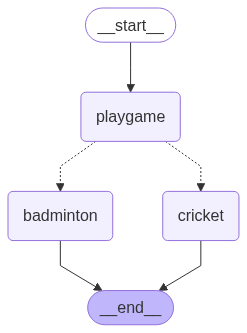

In [37]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [38]:
graph_builder.invoke({"name":"Ravi"})

play game
cricket is your choice


{'name': 'Ravi', 'game': 'cricket'}

In [39]:
graph_builder.invoke({"name":23})

play game
cricket is your choice


{'name': 23, 'game': 'cricket'}

summary : Even though the 23 is not a string of name type dict as mentioned in stategraph. It will not throw an error at run time 

that is the reason we use pydantic data validation for input type

### Dataclasses

python dataclasses provide another way to define structured data.
Dataclasses offer a concise syntax for creating that are primarily used to store data.

In [40]:
from dataclasses import dataclass

@dataclass
class dataclassstate:
    name:str
    game:Literal['cricket','badminton']

In [41]:
def play_game(state:dataclassstate):
    print('play game')
    return {"name":state.name}
def cricket(state:dataclassstate):
    print('cricket is your choice')
    return {'game':'cricket'}
def badminton(state:dataclassstate):
    print('badminton is your choice')
    return {'game':'badminton'}

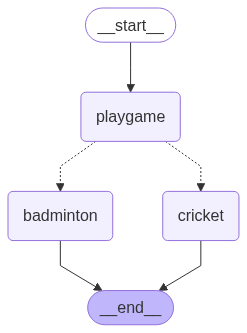

play game
cricket is your choice


{'name': 'Ravi', 'game': 'cricket'}

In [43]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
import random
graph = StateGraph(dataclassstate)
graph.add_node('playgame',play_game)
graph.add_node('cricket',cricket)
graph.add_node('badminton',badminton)

graph.add_edge(START,'playgame')
graph.add_conditional_edges('playgame',decide_play)
graph.add_edge('cricket',END)
graph.add_edge("badminton",END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))
graph_builder.invoke({"name":"Ravi",'game':'cricket'})

### Pydantic

In [44]:
from pydantic import BaseModel
class state(BaseModel):
    name:str

In [46]:
def sample_node(state:state):
    return {'name':"ravi"}

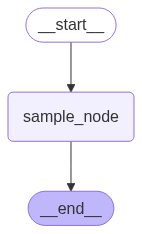

{'name': 'ravi'}

In [47]:
graph = StateGraph(state)
graph.add_node('sample_node',sample_node)
# graph.add_node('cricket',cricket)
# graph.add_node('badminton',badminton)

graph.add_edge(START,'sample_node')
# graph.add_conditional_edges('playgame',decide_play)
graph.add_edge('sample_node',END)
# graph.add_edge("badminton",END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))
graph_builder.invoke({"name":"Ravi",'game':'cricket'})

In [49]:
graph_builder.invoke({"name":12,'game':'cricket'})



ValidationError: 1 validation error for state
name
  Input should be a valid string [type=string_type, input_value=12, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type

summary: Even during the Runtime using the pydantic we were able to throw the error 